In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

df=pd.read_csv('C:/Users/asnav/Desktop/MachineLearning/datasets/wine_data.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


In [2]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [3]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
20995,9.7,1.02,0.91,50.0,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.61,0.88,53.8,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.46,1.04,52.1,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.03,1.09,25.3,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9
20999,9.3,0.93,1.32,33.6,0.412,128.7,290.1,1.02182,3.16,1.42,13.0,9


In [4]:
df.shape

(21000, 12)

In [5]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
x=df.iloc[:,:-1].values 
x

array([[11.6  ,  0.58 ,  0.66 , ...,  3.25 ,  0.57 ,  9.   ],
       [10.4  ,  0.61 ,  0.49 , ...,  3.16 ,  0.63 ,  8.4  ],
       [ 7.4  ,  1.185,  0.   , ...,  3.63 ,  0.54 , 10.7  ],
       ...,
       [13.4  ,  0.46 ,  1.04 , ...,  2.89 ,  1.76 ,  9.3  ],
       [ 6.6  ,  1.03 ,  1.09 , ...,  2.94 ,  1.54 , 12.9  ],
       [ 9.3  ,  0.93 ,  1.32 , ...,  3.16 ,  1.42 , 13.   ]],
      shape=(21000, 11))

In [9]:
y=df.iloc[:,-1].values 
y

array([3, 3, 3, ..., 9, 9, 9], shape=(21000,))

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[12.5 ,  0.61,  1.32, ...,  3.28,  0.72, 10.7 ],
       [ 6.7 ,  0.23,  0.31, ...,  3.33,  0.64, 10.7 ],
       [ 6.3 ,  0.28,  0.24, ...,  3.39,  0.57,  9.7 ],
       ...,
       [ 9.  ,  1.1 ,  0.87, ...,  3.3 ,  1.26, 12.2 ],
       [ 7.2 ,  0.36,  0.46, ...,  3.4 ,  0.85, 11.  ],
       [12.3 ,  1.06,  1.15, ...,  3.2 ,  1.42, 10.5 ]], shape=(14700, 11))

In [11]:
x_test

array([[ 7.2  ,  1.27 ,  1.31 , ...,  2.9  ,  1.56 , 12.9  ],
       [12.7  ,  1.12 ,  0.92 , ...,  3.13 ,  1.1  , 13.   ],
       [ 6.9  ,  0.37 ,  0.23 , ...,  3.23 ,  0.42 , 10.   ],
       ...,
       [ 8.1  ,  0.2  ,  0.4  , ...,  3.12 ,  0.54 , 11.2  ],
       [ 6.5  ,  0.315,  0.2  , ...,  2.94 ,  0.51 ,  8.8  ],
       [10.2  ,  1.04 ,  1.26 , ...,  3.48 ,  1.37 , 13.   ]],
      shape=(6300, 11))

In [12]:
y_train

array([4, 8, 7, ..., 4, 7, 3], shape=(14700,))

In [13]:
y_test

array([5, 9, 5, ..., 6, 5, 3], shape=(6300,))

In [14]:
scaler=MinMaxScaler()
scaler.fit(x_train) 
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.71900826, 0.36805556, 0.83018868, ..., 0.43410853, 0.28      ,
        0.39130435],
       [0.23966942, 0.10416667, 0.19496855, ..., 0.47286822, 0.23428571,
        0.39130435],
       [0.20661157, 0.13888889, 0.1509434 , ..., 0.51937984, 0.19428571,
        0.24637681],
       ...,
       [0.42975207, 0.70833333, 0.54716981, ..., 0.4496124 , 0.58857143,
        0.60869565],
       [0.28099174, 0.19444444, 0.28930818, ..., 0.52713178, 0.35428571,
        0.43478261],
       [0.70247934, 0.68055556, 0.72327044, ..., 0.37209302, 0.68      ,
        0.36231884]], shape=(14700, 11))

In [15]:
x_test

array([[0.28099174, 0.82638889, 0.82389937, ..., 0.13953488, 0.76      ,
        0.71014493],
       [0.73553719, 0.72222222, 0.57861635, ..., 0.31782946, 0.49714286,
        0.72463768],
       [0.25619835, 0.20138889, 0.14465409, ..., 0.39534884, 0.10857143,
        0.28985507],
       ...,
       [0.3553719 , 0.08333333, 0.25157233, ..., 0.31007752, 0.17714286,
        0.46376812],
       [0.2231405 , 0.16319444, 0.12578616, ..., 0.17054264, 0.16      ,
        0.11594203],
       [0.52892562, 0.66666667, 0.79245283, ..., 0.58914729, 0.65142857,
        0.72463768]], shape=(6300, 11))

In [16]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([3, 9, 6, ..., 6, 5, 4], shape=(6300,))

In [17]:
y_test

array([5, 9, 5, ..., 6, 5, 3], shape=(6300,))

In [18]:
unique_arr = list(y_test)
unique_arr 

[np.int64(5),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(4),
 np.int64(3),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(5),
 np.int64(3),
 np.int64(3),
 np.int64(6),
 np.int64(6),
 np.int64(7),
 np.int64(3),
 np.int64(8),
 np.int64(3),
 np.int64(7),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(3),
 np.int64(4),
 np.int64(8),
 np.int64(6),
 np.int64(4),
 np.int64(9),
 np.int64(3),
 np.int64(9),
 np.int64(8),
 np.int64(8),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(9),
 np.int64(5),
 np.int64(5),
 np.int64(7),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(7),
 np.int64(7),
 np.int64(6),
 np.int64(5),
 np.int64(9),
 np.int64(8),
 np.int64(8),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(6),
 np.int64(4),
 np.int64(8),
 np.int64(9),
 np.int64(8),
 np.int64(3),
 np.int64(8),
 np.int64(7),
 np.int64(3),
 np.int64(8),
 np.int64(9),
 np.in

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[362, 115,   6,   4,   0, 148, 282],
       [274, 126,  35,  29,   0, 188, 275],
       [ 97,  30, 393, 250,   0,  53,  91],
       [ 19,   4, 194, 657,   2,   9,  16],
       [195,  69,  10, 307,   7, 108, 194],
       [293,  74,   2,  45,   3, 188, 245],
       [276,  88,   0,   1,   0, 178, 358]])

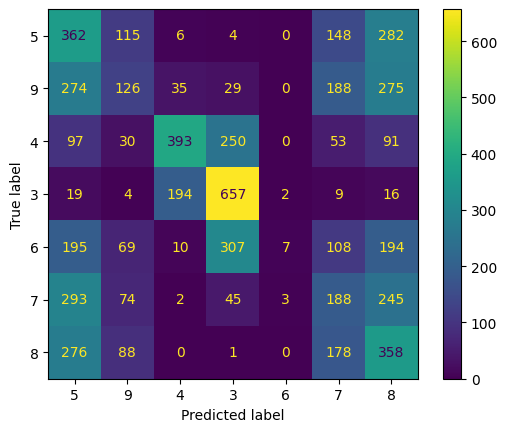

In [20]:
labels=['5','9','4','3','6','7','8']# order as y_test
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [21]:
score=accuracy_score(y_test,y_pred)
score

0.3319047619047619

In [22]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.24      0.39      0.30       917
           4       0.25      0.14      0.18       927
           5       0.61      0.43      0.51       914
           6       0.51      0.73      0.60       901
           7       0.58      0.01      0.02       890
           8       0.22      0.22      0.22       850
           9       0.25      0.40      0.30       901

    accuracy                           0.33      6300
   macro avg       0.38      0.33      0.30      6300
weighted avg       0.38      0.33      0.30      6300

